<a href="https://colab.research.google.com/github/JiaxinLi-lipluszn/Temp_notebooks/blob/main/preprocess_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scanpy

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.chdir("/content/drive/MyDrive/scRNA/")

In [ ]:
import numpy as np
import pandas as pd
import scanpy as sc
import scipy
import anndata as ad
import seaborn as sns
import pickle

In [ ]:
sc.settings.verbosity = 1             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()
sc.settings.set_figure_params(dpi=80, frameon=False, figsize=(3, 3), facecolor='white')

The `sinfo` package has changed name and is now called `session_info` to become more discoverable and self-explanatory. The `sinfo` PyPI package will be kept around to avoid breaking old installs and you can downgrade to 0.3.2 if you want to use it without seeing this message. For the latest features and bug fixes, please install `session_info` instead. The usage and defaults also changed slightly, so please review the latest README at https://gitlab.com/joelostblom/session_info.
-----
anndata     0.7.6
scanpy      1.8.1
sinfo       0.3.4
-----
PIL                         7.1.2
astor                       0.8.1
bottleneck                  1.3.2
cached_property             1.5.2
cffi                        1.14.6
cloudpickle                 1.3.0
cycler                      0.10.0
cython_runtime              NA
dask                        2.12.0
dateutil                    2.8.1
debugpy                     1.0.0
decorator                   4.4.2
google                      NA
h5py      

In [ ]:
!gunzip ./data/RNA_expression_subset1a.csv.gz

## Create anndata objects

In [ ]:
## load count matrix csv, 
## create and save anndata object

### only need to run once ###

exp = pd.read_csv('./data/RNA_expression_subset1a.csv',index_col=0)
exp = pd.DataFrame(exp, dtype='int')
exp_X = scipy.sparse.csr_matrix(exp)
exp_var=pd.DataFrame(index=exp.index) ## Genes/features
exp_obs=pd.DataFrame(index=exp.columns) ## Barcodes/cells
adata = ad.AnnData(exp_X.T, obs=exp_obs, var=exp_var, dtype='int32')
adata


pickle.dump(adata, open("./adata.pickle", "wb"))

In [ ]:
one_cell = np.array(exp.iloc[:,0])

In [ ]:
one_cell.shape

(23712,)

In [ ]:
exp_var

""
GENE
A1BG
A1BG-AS1
A1CF
A2M
A2M-AS1
...
ZXDC
ZYG11A
ZYG11B


In [ ]:
exp_obs.shape

(27291, 0)

In [ ]:
adata=pickle.load(open('./adata.pickle', 'rb'))
adata

AnnData object with n_obs × n_vars = 27291 × 23712

## Pre-process

In [ ]:
adata

AnnData object with n_obs × n_vars = 27291 × 23712

In [ ]:
meta = pd.read_csv('./data/RNA_metadata.csv',index_col=0)


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3,5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
meta = meta.drop(index = "TYPE")

In [ ]:
meta_subset = pd.merge(meta,exp_obs, how = "inner" , left_index= True, right_index= True)

In [ ]:
meta_subset['sgRNA'] = meta_subset['MOI'].where(meta_subset["MOI"] != "1", meta["sgRNA"])

In [ ]:
meta_subset["perturb"] = meta_subset.apply(lambda x: x.sgRNA.split("_")[0], axis = 1)

In [ ]:
import matplotlib.pyplot as plt
a = pd.DataFrame(meta_subset["perturb"].value_counts())
#plt.hist()
#plt.show()

In [ ]:
pd.set_option('display.max_rows', None)

In [ ]:
a

,perturb
2,5949
0,2813
3,2146
NO,1056
4,846
ONE,772
5,393
6,195
7,109
TGFB1,96


In [ ]:
labels = meta_subset["perturb"].unique()
label_10 = labels[3:13,]

In [ ]:
meta_subset = meta_subset.iloc[[(x in label_10) for x in meta_subset.perturb]]

In [ ]:
adata.obs["label"]=pd.Series(meta_subset["perturb"],dtype="str")

In [ ]:
adata.obs["condition"]=pd.Series(meta_subset["condition"],dtype="str")

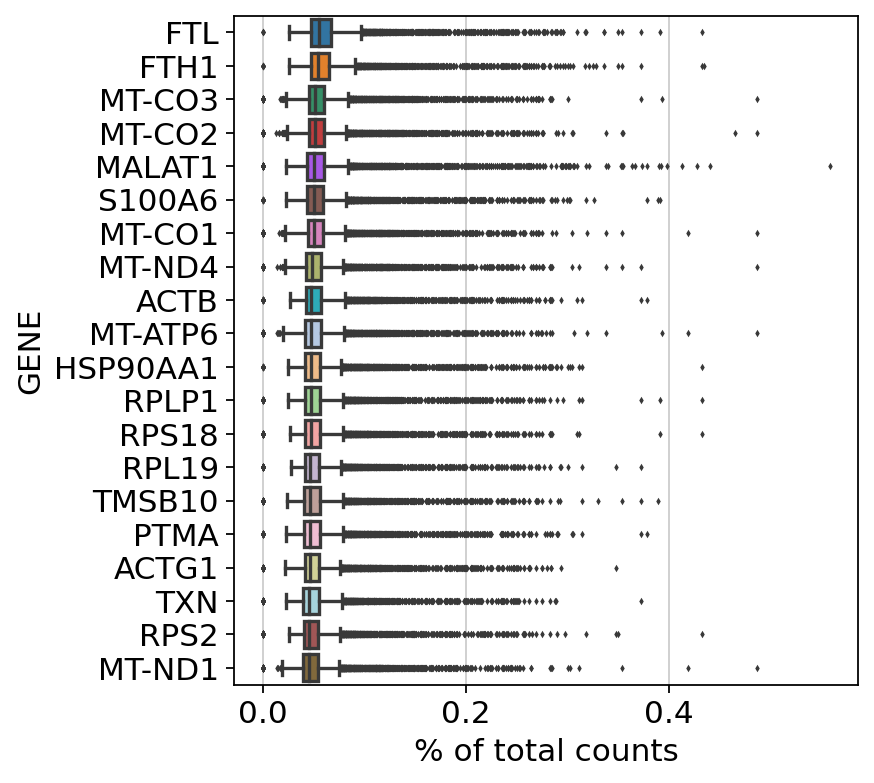

In [ ]:
## plot top 100 highest expressed gene
sc.pl.highest_expr_genes(adata, n_top= 20, )

... storing 'label' as categorical
... storing 'condition' as categorical


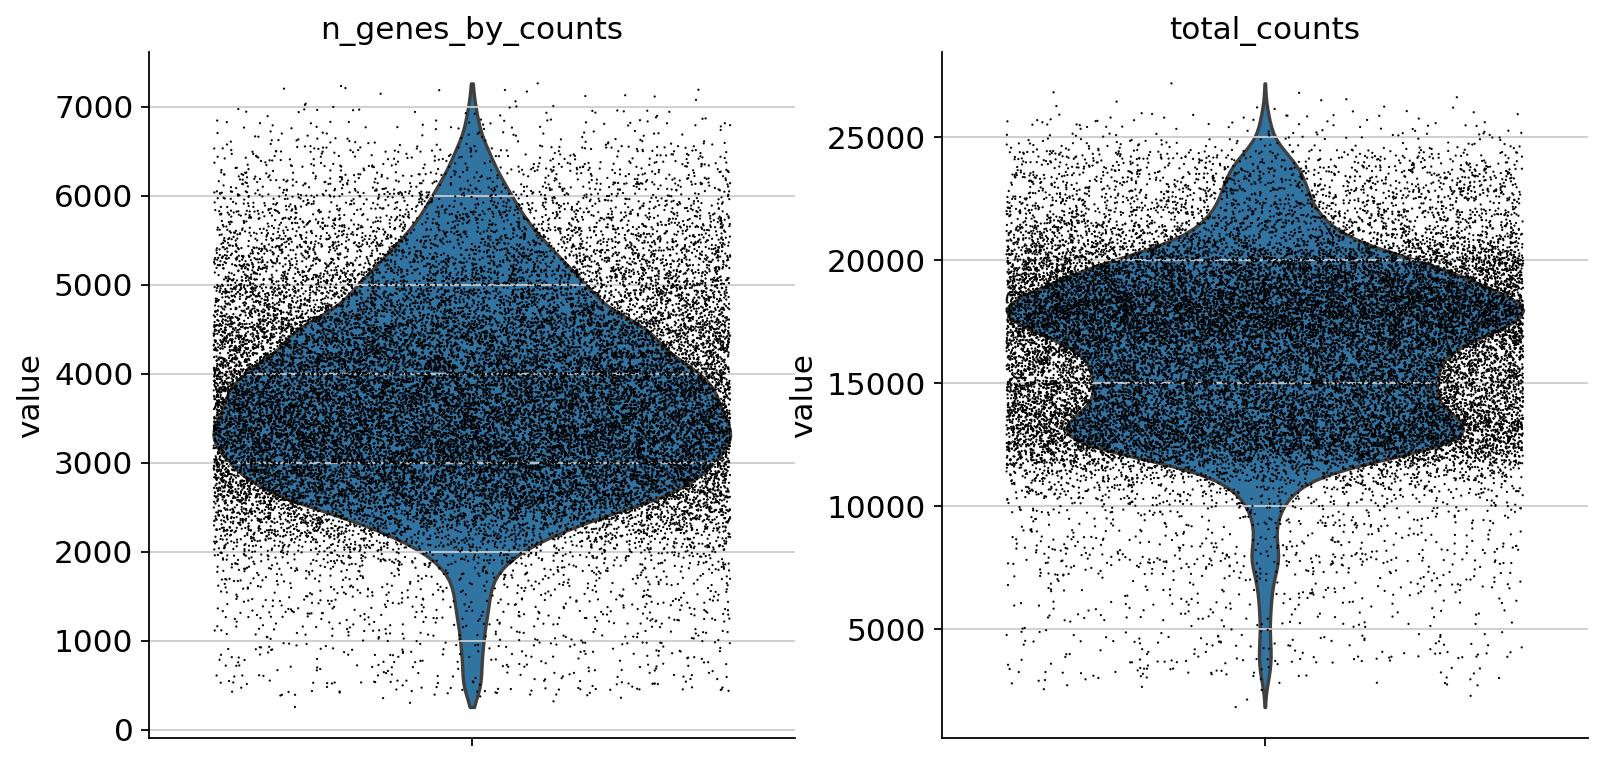

In [ ]:
## Calculate quality control metrics, and visualize the violin plot
sc.pp.calculate_qc_metrics(adata, percent_top=None, log1p=False, inplace=True)

sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts'],jitter=0.4, multi_panel=True)

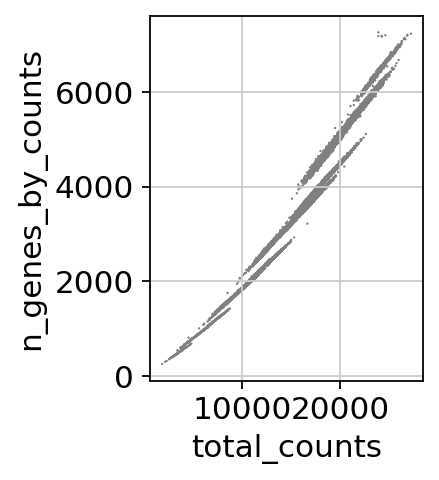

In [ ]:
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

In [ ]:
mito_genes = adata.var_names.str.startswith('MT-')
adata.obs['pmito'] = np.sum(adata[:, mito_genes].X, axis=1) / np.sum(adata.X, axis=1)
print('Ncells=%d have >18percent mt expression' % np.sum(adata.obs['pmito']>0.18))

Ncells=0 have >18percent mt expression


In [ ]:
## filter out cells from 
sc.pp.filter_cells(adata, min_genes=200)
adata = adata[adata.obs.pmito <= 0.18, :]

## filter out genes from 
sc.pp.filter_genes(adata, min_cells=200)

Trying to set attribute `.var` of view, copying.


In [ ]:
sc.pp.neighbors(adata)

In [ ]:
sc.tl.umap(adata)

In [ ]:
from matplotlib import cm

... storing 'label' as categorical


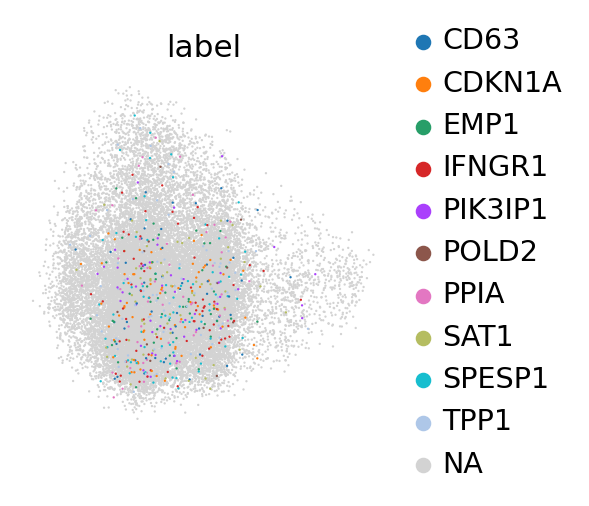

In [ ]:
sc.pl.pca(adata, color = "label")

In [ ]:
meta_subset[col_name].value_counts()

In [ ]:
meta_subset.perturb.plot.bar()

TypeError: ignored

In [ ]:
# filter out cells from rare labels, i.e., less than 50 cells

labels = adata.obs[['perturbation', 'batch']].value_counts()
labels = labels[labels > 50]
adata = adata[adata.obs.perturbation.isin(labels.loc[(slice(None), 'SARS2')].index)]

In [ ]:
sc.pp.normalize_total(adata, target_sum=1e6) 
sc.pp.log1p(adata) ## log transform

In [ ]:
import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

NameError: ignored

In [ ]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [ ]:
class DINO_Crop(object):
  def __init__(self, global_crops_scale, local_crops_scale, local_crops_number):
    self.global_crops_scale = global_crops_scale
    self.local_crops_scale = local_crops_scale
    self.local_crops_number = local_crops_number
    
  def __call__(self, x):
    inputs = []
    data = x  
    global_size = int(784 * self.global_crops_scale)
    local_size = int(784 * self.local_crops_scale)
    global_index_1 = np.random.choice(784, size = global_size, replace = False)
    global_index_2 = np.random.choice(784, size = global_size, replace = False)
    
    global_corr_1 = torch.from_numpy(global_index_1)
    global_corr_2 = torch.from_numpy(global_index_2)
    
    global_data_1 = data[global_index_1,]
    global_data_2 = data[global_index_2,]
    #print(data.shape)
    #print(corr.shape)
    #labels = torch.from_numpy(label.item()*np.ones(shape = (784,1))).float()
    global_input_1 = torch.cat([global_data_1, global_corr_1]).float()
    global_input_2 = torch.cat([global_data_2, global_corr_2]).float()
    inputs.append(global_input_1)
    inputs.append(global_input_2)
    for i in range(self.local_crops_number):
      index = np.random.choice(784, size = local_size, replace = False)
      corr = torch.from_numpy(index)
      data_local = data[index,]
      input_local = torch.cat([data_local, corr]).float()
      inputs.append(input_local)
    return inputs

In [ ]:
import os
import pandas as pd

class scRNACSV(Dataset):
  def __init__(self, expression_matrix_path, transform = DINO_Crop, target_transform=None):
    self.expr = pd.read_csv(expression_matrix_path, index_col= 0)
    self.transform = transform
    self.target_transform = target_transform
  def __len__(self):
    return self.expr.shape[1]

  def __getitem__(self,idx):
    one_cell = torch.from_numpy(np.array(self.expr.iloc[:,idx]))
    if self.transform:
      ret = self.transform(one_cell)
      return ret


In [ ]:
crop = DINO_Crop(0.7, 0.25, 8)

In [ ]:
train_dataset = scRNACSV("/content/drive/MyDrive/scRNA/data/RNA_expression_subset1a.csv", transform = crop)

In [ ]:
from torch.utils.data import DataLoader
train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True)

In [ ]:
train_features = next(iter(train_dataloader))

In [37]:
train_features[0].shape

torch.Size([64, 1096])

In [ ]:
from torchvision import datasets, transforms
class Crop(object):
  def __init__(self, global_crops_scale, local_crops_scale, local_crops_number):
    self.global_crops_scale = global_crops_scale
    self.local_crops_scale = local_crops_scale
    self.local_crops_number = local_crops_number
    self.totensor = transforms.ToTensor()
  def __call__(self, x):
    inputs = []
    data = self.totensor(x)
    data = torch.flatten(data)  
    global_size = int(784 * self.global_crops_scale)
    local_size = int(784 * self.local_crops_scale)
    global_index_1 = np.random.choice(784, size = global_size, replace = False)
    global_index_2 = np.random.choice(784, size = global_size, replace = False)
    
    global_corr_1 = torch.from_numpy(global_index_1)
    global_corr_2 = torch.from_numpy(global_index_2)
    
    global_data_1 = data[global_index_1,]
    global_data_2 = data[global_index_2,]
    #print(data.shape)
    #print(corr.shape)
    #labels = torch.from_numpy(label.item()*np.ones(shape = (784,1))).float()
    global_input_1 = torch.cat([global_data_1, global_corr_1]).float()
    global_input_2 = torch.cat([global_data_2, global_corr_2]).float()
    inputs.append(global_input_1)
    inputs.append(global_input_2)
    for i in range(self.local_crops_number):
      index = np.random.choice(784, size = local_size, replace = False)
      corr = torch.from_numpy(index)
      data_local = data[index,]
      input_local = torch.cat([data_local, corr]).float()
      inputs.append(input_local)
    return inputs

In [ ]:
transform = Crop(
        0.7,
        0.25,
        8
    )
dataset = datasets.FashionMNIST(root = "/content/drive/MyDrive/DINO_Group/Jul_10/", download = True, transform=transform)
  

/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [ ]:
crop_loader = DataLoader(dataset, batch_size=64, shuffle=True)

In [ ]:
features = next(iter(crop_loader))

In [41]:
features[0][0].shape

torch.Size([64, 1096])

In [ ]:
transform = Crop(
        args.global_crops_scale,
        args.local_crops_scale,
        args.local_crops_number,
    )
dataset = datasets.FashionMNIST(root = args.data_path, download = True, transform=transform)
  

In [42]:
import os
os.chdir("/content/drive/MyDrive/DINO_Group/128+128_TS/")

In [46]:
len(train_dataset)

27291

In [45]:
427*64

27328